In [18]:
import sys
print('python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn: {}'.format(seaborn.__version__))

import pandas
print('pandas: {}'.format(pandas.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

%matplotlib inline

python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
seaborn: 0.7.1
pandas: 0.18.1
sklearn: 0.17.1


In [19]:
url='http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data'
names=['sepal_length','sepal_width','petal_length','petal_width','class']
data=pandas.read_csv(url,names=names)

In [20]:
data.shape

(150, 5)

In [21]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [22]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
pandas.set_option('display.width',100)
pandas.set_option('precision',3)
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [25]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [26]:
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000,-0.109,0.872,0.818
sepal_width,-0.109,1.000,-0.421,-0.357
petal_length,0.872,-0.421,1.000,0.963
petal_width,0.818,-0.357,0.963,1.000


In [27]:
data.skew()

sepal_length    0.315
sepal_width     0.334
petal_length   -0.274
petal_width    -0.105
dtype: float64

In [28]:
# petal_length and petal_width are higly correlated (0.963)
# picking petal_width for low std (0.763)

# sepal_length is highly correlated with petal_length(0.872) and petal_width(0.818)
# This will be covered by our choice of petal_width

# sepal_width is not correlated with any other, and has low std(0.434)

# Features selected: sepal_width, petal_width

In [29]:
from matplotlib import pyplot
pyplot.style.use('ggplot')

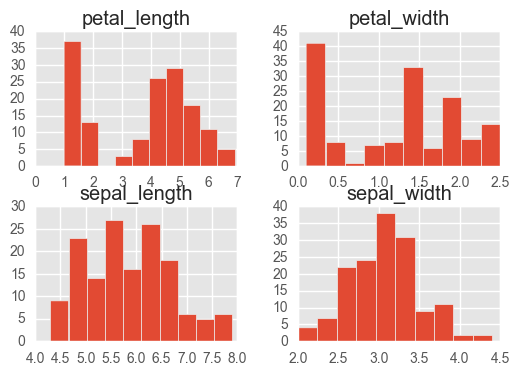

In [30]:
data.hist()
pyplot.show()

In [31]:
# correlation between data attributes and class
def plot_corr(data, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data.corr()    # data frame correlation function
    fig, ax = pyplot.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    pyplot.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    pyplot.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

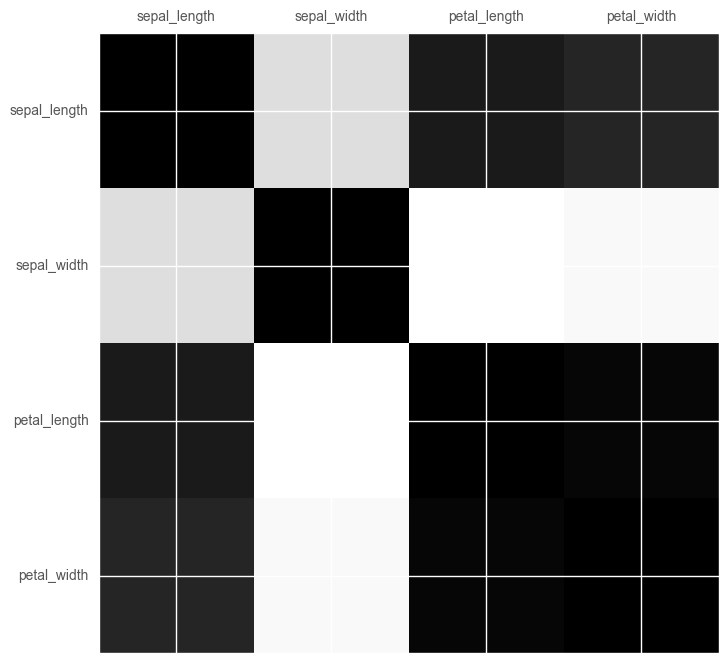

In [33]:
plot_corr(data,8)

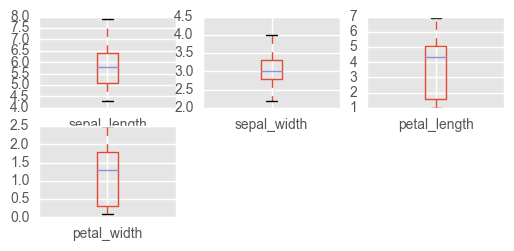

In [35]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

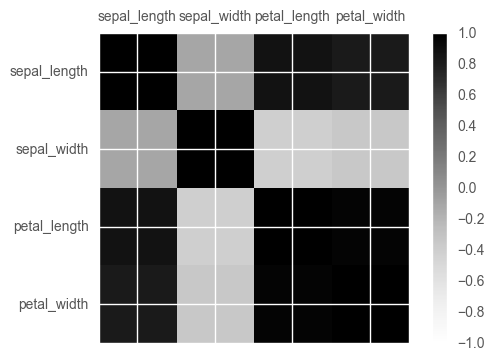

In [37]:
# Multivariate: Correlation Matrix Plot
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

LR: 0.880000 (0.148474)
LDA: 0.966667 (0.061464)
KNN: 0.933333 (0.084327)
NB: 0.946667 (0.058119)
CART: 0.940000 (0.069602)
SVM: 0.953333 (0.052068)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


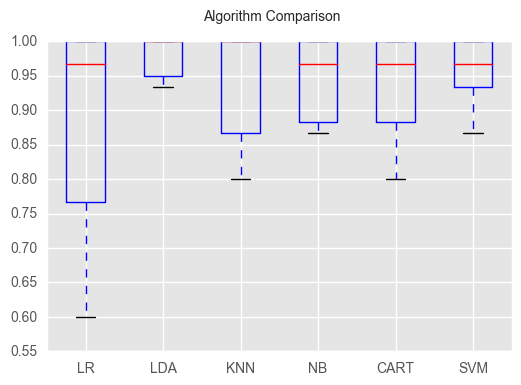

In [38]:
# Compare Algorithms

# Classification, Linear
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Classification, Nonlinear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import cross_validation

# load dataset
array = data.values
X = array[:,0:4]
Y = array[:,4]
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LR: 0.826667 (0.227450)
LDA: 0.960000 (0.061101)
KNN: 0.946667 (0.065320)
NB: 0.940000 (0.069602)
CART: 0.913333 (0.115662)
SVM: 0.953333 (0.066999)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


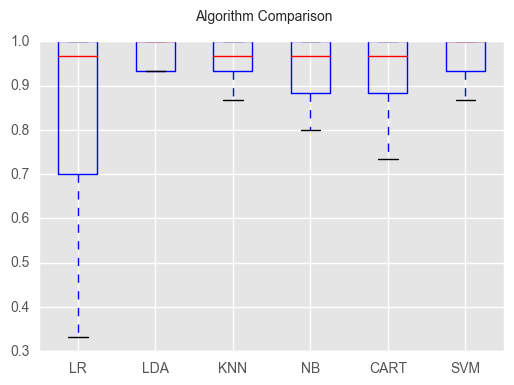

In [40]:
# Compare Algorithms

# Classification, Linear
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Classification, Nonlinear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import cross_validation

# load dataset
array = data.values
X = array[:,[1,3]]
Y = array[:,4]
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()